In [7]:
import pandas as pd
df = pd.read_csv('data_clean.csv')

df.columns = ['r'] + list(df.columns[1:])
import numpy as np
#prepare the data
data = df[df.columns[1:]].values
np.random.shuffle(data)
X = data[:,:-1]
y = data[:,-1]
t = 0.15 #keep 10 percent for testing
X.shape

(97L, 6663L)

In [28]:
#try to remove some features 
from sklearn import decomposition 
pca = decomposition.PCA()
pca.fit(X)
pca.n_components = 100
Xr = pca.fit_transform(X)
Xr.shape

(97L, 97L)

In [43]:
#Now try to find the most interesting dimensions 
from sklearn.dummy import DummyClassifier
def randomizedData(data):
    np.random.shuffle(data)
    pca = decomposition.PCA()
    pca.fit(X)
    pca.n_components = 10
    Xr = pca.fit_transform(X)
    Xr.shape
    t = 0.15 #keep 15 percent for testing
    x_train = Xr[t*len(Xr):]
    x_test = Xr[:t*len(Xr)]
    y_train = y[t*len(y):]
    y_test = y[:t*len(y)]
    return (x_train,y_train,x_test,y_test)

r = []
rdummy = []
n=1000
for i in range(n):
    xy = randomizedData(data)
    clf = RandomForestClassifier()
    clf.fit(xy[0],xy[1])
    r+=[clf.score(xy[2],xy[3])]
    clf2 = DummyClassifier()
    clf2.fit(xy[0],xy[1])
    rdummy += [clf2.score(xy[2],xy[3])]        
r = np.array(r)
rdummy = np.array(rdummy)
print r.mean(),r.std()
print rdummy.mean(),rdummy.std()

0.693714285714 0.114888055542
0.292785714286 0.116916135127


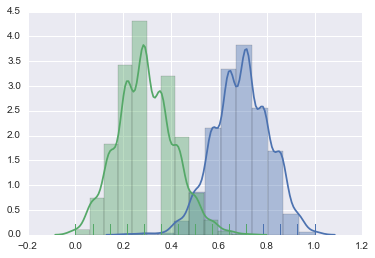

In [44]:
%matplotlib inline
import seaborn as sns 
sns.distplot(r,bins=12,rug=True)
sns.distplot(rdummy,bins=12,rug=True)